In [1]:
import numpy as np
from scipy.interpolate import interpolate
from scipy.ndimage import interpolation
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

### Read data

In [2]:
mnist = fetch_mldata('mnist-original', data_home='D:\\HK9\\TVu_RTC\\CKy\\HW')
X_all = mnist.data
Y_all = mnist.target

### Filter data and mix data

In [3]:
X0 = X_all[np.where(Y_all == 0)[0]]
X1 = X_all[np.where(Y_all == 1)[0]]
X = np.concatenate((X0, X1), axis=0)

In [4]:
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])
y = np.concatenate((y0, y1), axis=0)

In [5]:
a = np.arange(len(y))
np.random.shuffle(a)
X = X[a,:]
y= y[a]

In [6]:
m = 12000
m_test = X.shape[0] - m
x_train, x_test = X[:m], X[m:]
y_train, y_test = y[:m], y[m:]

1.0


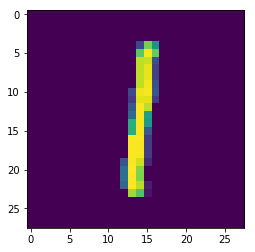

In [7]:
i = 3
plt.imshow(x_train[i,:].reshape(28, 28))
print(y_train[i])

In [8]:
model = LogisticRegression(C=1e5)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
print("acc: %.2f" %(100 * accuracy_score(y_test, y_predict.tolist())))

acc: 99.86


real:  0.0 , predict:  0.0


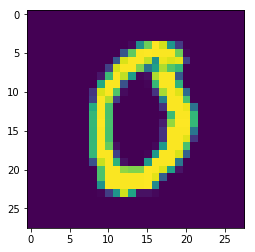

In [13]:
i = 100
plt.imshow(x_test[i,:].reshape(28, 28))
print('real: ',y_test[i],', predict: ',y_predict[i])